# Text data Processing

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Bag of Words
- document-term matrix
- tfidf

In [99]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [101]:
corpus = [
    'This is the first document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [102]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)

In [104]:
X.toarray()


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [105]:

print(X.toarray())
print(vect.get_feature_names())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [107]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray().round(2))
print(vect.get_feature_names())

[[0.   0.47 0.58 0.38 0.   0.   0.38 0.   0.38]
 [0.   0.69 0.   0.28 0.   0.54 0.28 0.   0.28]
 [0.51 0.   0.   0.27 0.51 0.   0.27 0.51 0.27]
 [0.   0.47 0.58 0.38 0.   0.   0.38 0.   0.38]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [108]:
vect = TfidfVectorizer(ngram_range=[1,2], stop_words='english')
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[1.  0.  0.  0. ]
 [0.6 0.5 0.5 0.5]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0. ]]
['document', 'document second', 'second', 'second document']


### practical example

In [109]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0   4147      0 --:--:-- --:--:-- --:--:--  4147
100   137    0   137    0     0    376      0 --:--:-- --:--:-- --:--:--   376
100   318  100   318    0     0    526      0 --:--:-- --:--:-- --:--:--   526
100  488k  100  488k    0     0   483k      0  0:00:01  0:00:01 --:--:-- 8522k


In [110]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
sms.shape

(5574, 2)

In [112]:
sms.columns = ['category', 'text']
sms.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [113]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

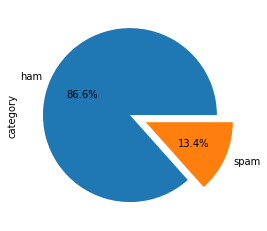

In [114]:
sms['category'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [118]:
sms_corpus = sms['text']
vect = CountVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [129]:
X.toarray().sum(0).argsort()[-5:][::-1]

array([751, 373, 306, 426, 510])

In [122]:
X.toarray().sum(0).argsort()[-5:][::-1]

array([751, 373, 306, 426, 510])

In [123]:
# 5 most frequently appeared words
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
iidx
[vect.get_feature_names()[i] for i in iidx]

['ur', 'just', 'gt', 'lt', 'ok']

In [124]:
[X.toarray().sum(0)[i] for i in iidx]

[391, 376, 318, 316, 293]

In [130]:
vect = TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
print([vect.get_feature_names()[i] for i in iidx])
print([X.toarray().sum(0)[i] for i in iidx])

['ok', 'just', 'll', 'ur', 'come']
[122.06978727192575, 106.16332625717925, 96.57382567023429, 91.57779277147964, 87.15189392798636]


### word cloud

In [131]:
spam_sms = sms[sms["category"] == "spam"]["text"]
ham_sms = sms[sms["category"] == "ham"]["text"]

spam_words = []
ham_words = []

In [ ]:
spam_sms.values.shape

(747,)

In [132]:
!pip install nltk

In [133]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
for i in range(spam_sms.values.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                              if word.lower() not in stopwords.words('english') and
                                 word.lower().isalpha()]
    spam_words = spam_words + words

In [135]:
len(spam_words)

9411

In [136]:
!pip install wordcloud

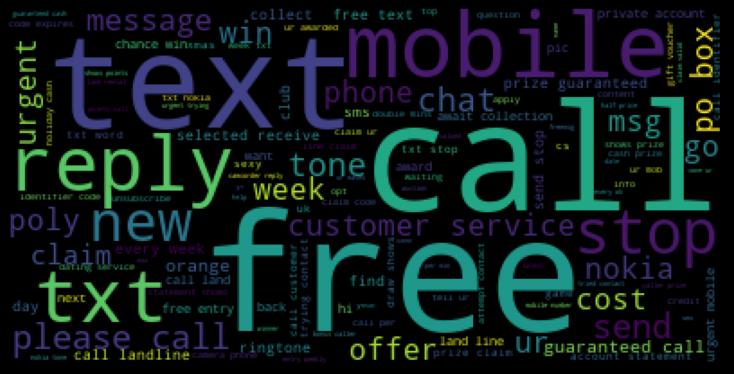

In [137]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

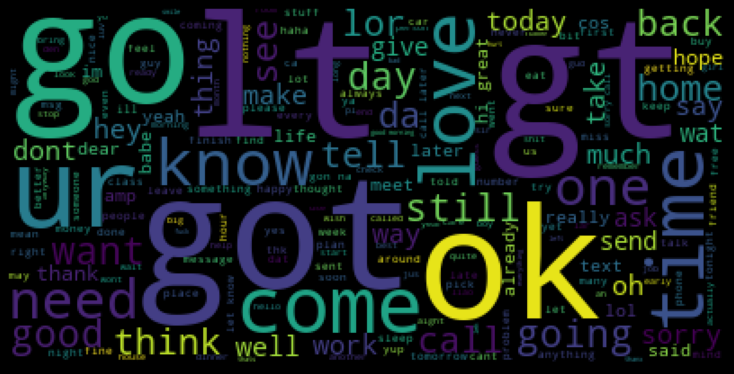

In [138]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words
    
wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Word Embedding
- word vector

In [139]:
!pip install gensim

In [ ]:
from gensim.models.word2vec import Word2Vec

In [141]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [142]:
model = Word2Vec(sentences, min_count=1, size=5)

In [143]:
print(model)

Word2Vec(vocab=14, size=5, alpha=0.025)


In [144]:
words = list(model.wv.vocab)   # summarize the vocabulary
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [145]:
model['sentence','this']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.07956889, -0.00649049,  0.0248189 ,  0.0279501 , -0.05059651],
       [-0.00050096, -0.04319227, -0.04660303, -0.03561807, -0.04923034]],
      dtype=float32)

In [146]:
# dim 5 --> dim 2  (dimension reduction)
from sklearn.decomposition import PCA


In [147]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [149]:
model[model.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.00050096, -0.04319227, -0.04660303, -0.03561807, -0.04923034],
       [-0.09336133, -0.08228255,  0.09171245,  0.01652639, -0.02895858],
       [-0.03224177,  0.03670186,  0.01340566,  0.01414302,  0.05664051],
       [ 0.09631481, -0.07062005, -0.07679898, -0.09182955, -0.02952224],
       [-0.07956889, -0.00649049,  0.0248189 ,  0.0279501 , -0.05059651],
       [ 0.01299089,  0.03656048,  0.02704126,  0.00914166,  0.07195734],
       [ 0.07913329, -0.03927758,  0.00896223, -0.0028005 , -0.08399615],
       [ 0.00459891,  0.0004704 ,  0.03032635, -0.0927981 , -0.07916884],
       [ 0.06687828, -0.00164996,  0.01770748,  0.09586975,  0.01301687],
       [ 0.03770479,  0.06425229, -0.0421465 , -0.04673747,  0.07574388],
       [-0.04902317, -0.06308606,  0.02969667, -0.06613326, -0.00929098],
       [ 0.00015763,  0.07966693,  0.05568078,  0.05657605,  0.06387711],
       [ 0.01638484,  0.01220977, -0.09970724, -0.09016389,  0.00565658],
       [-0.08732203,  0.0926529 , -0.0

In [148]:
result

array([[ 0.06596808,  0.0223855 ],
       [-0.03987901,  0.14537345],
       [-0.06752169, -0.02686438],
       [ 0.15791559, -0.03965477],
       [-0.04677887,  0.08054259],
       [-0.05509317, -0.05163898],
       [ 0.06763059,  0.02512756],
       [ 0.0718617 ,  0.04529329],
       [-0.05292962, -0.02884368],
       [ 0.00101147, -0.11501346],
       [ 0.03839587,  0.07011582],
       [-0.11735301, -0.04742295],
       [ 0.08465517, -0.07009706],
       [-0.1078831 , -0.00930295]], dtype=float32)

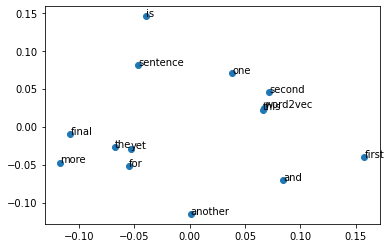

In [150]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [ ]:
model[words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.00050096, -0.04319227, -0.04660303, -0.03561807, -0.04923034],
       [-0.09336133, -0.08228255,  0.09171245,  0.01652639, -0.02895858],
       [-0.03224177,  0.03670186,  0.01340566,  0.01414302,  0.05664051],
       [ 0.09631481, -0.07062005, -0.07679898, -0.09182955, -0.02952224],
       [-0.07956889, -0.00649049,  0.0248189 ,  0.0279501 , -0.05059651],
       [ 0.01299089,  0.03656048,  0.02704126,  0.00914166,  0.07195734],
       [ 0.07913329, -0.03927758,  0.00896223, -0.0028005 , -0.08399615],
       [ 0.00459891,  0.0004704 ,  0.03032635, -0.0927981 , -0.07916884],
       [ 0.06687828, -0.00164996,  0.01770748,  0.09586975,  0.01301687],
       [ 0.03770479,  0.06425229, -0.0421465 , -0.04673747,  0.07574388],
       [-0.04902317, -0.06308606,  0.02969667, -0.06613326, -0.00929098],
       [ 0.00015763,  0.07966693,  0.05568078,  0.05657605,  0.06387711],
       [ 0.01638484,  0.01220977, -0.09970724, -0.09016389,  0.00565658],
       [-0.08732203,  0.0926529 , -0.0

In [151]:
model.most_similar('word2vec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('first', 0.5929351449012756),
 ('this', 0.5092456936836243),
 ('second', 0.4894620478153229),
 ('yet', 0.28562474250793457),
 ('one', -0.012821015901863575),
 ('and', -0.017982589080929756),
 ('is', -0.04903244599699974),
 ('sentence', -0.13258078694343567),
 ('final', -0.3982464373111725),
 ('another', -0.40729016065597534)]

In [152]:
model.similarity('sentence', 'word2vec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.13258077